# Business Understanding (Pemahaman Bisnis):
Tahap Business Understanding melibatkan pemahaman yang mendalam tentang tujuan bisnis, kebutuhan pemangku kepentingan, dan pertanyaan yang ingin dijawab melalui analisis data. Fokus pada pemahaman tentang konteks bisnis, masalah yang ingin dipecahkan, dan potensi nilai yang dapat dihasilkan.

Berdasarkan file dataset yang disediakan situs https://www.kaggle.com/datasets/uciml/iris?select=Iris.csv, kita dapat melihat beberapa informasi awal untuk memahami pemahaman bisnisnya:

Nama Dataset: Iris Dataset

Deskripsi Dataset: Dataset ini berisi informasi tentang tiga spesies bunga Iris (Setosa, Versicolor, dan Virginica). Setiap sampel bunga memiliki empat fitur (panjang dan lebar kelopak, panjang dan lebar mahkota) dan dilabeli dengan spesies yang sesuai.

Tujuan Bisnis yang Mungkin: Beberapa tujuan bisnis yang mungkin terkait dengan dataset ini bisa mencakup:

Klasifikasi: Mengembangkan model yang dapat mengklasifikasikan jenis-jenis bunga Iris berdasarkan fitur-fitur yang diberikan.

Identifikasi: Membangun model yang dapat mengidentifikasi spesies bunga Iris berdasarkan pengukuran fitur-fitur.

Pemahaman dan Visualisasi: Menganalisis hubungan antara fitur-fitur bunga Iris untuk memahami pola atau korelasi yang mungkin ada di antara mereka.

Prediksi: Menggunakan fitur-fitur bunga Iris untuk memprediksi spesies bunga berdasarkan pengukuran yang diberikan.

In [322]:
import pandas as pd
import numpy as np

# Data Understanding (Pemahaman Data):
Tahap Data Understanding melibatkan eksplorasi dan pemahaman tentang data yang tersedia. Ini mencakup pemahaman tentang struktur, kualitas, dan karakteristik data, serta pengeksplorasian awal untuk mengidentifikasi pola atau hubungan yang mungkin ada di dalamnya. Tujuannya adalah untuk mendapatkan pemahaman yang lebih baik tentang data yang akan digunakan dalam proses analisis.

Tahap Data Understanding dalam konteks CRISP-DM melibatkan eksplorasi dan pemahaman tentang karakteristik data yang terkandung dalam file dataset Iris.csv. Berikut adalah informasi yang dapat diperoleh dari dataset tersebut:

1. Tipe Data: Dataset ini dalam format file CSV (Comma-Separated Values), yang berarti setiap entri data dipisahkan oleh tanda koma.
2. Struktur Dataset: Dataset ini terdiri dari beberapa kolom, termasuk:
   - SepalLengthCm: Panjang kelopak bunga dalam sentimeter.
   - SepalWidthCm: Lebar kelopak bunga dalam sentimeter.
   - PetalLengthCm: Panjang mahkota bunga dalam sentimeter.
   - PetalWidthCm: Lebar mahkota bunga dalam sentimeter.
   - Species: Spesies bunga Iris yang terdiri dari tiga kategori, yaitu Setosa, Versicolor, dan Virginica.

3. Jumlah Data: Dataset ini mungkin berisi beberapa baris (instances) yang mewakili sampel bunga Iris.

4. Kualitas Data: Tahap ini melibatkan pengecekan integritas data untuk memastikan tidak ada nilai yang hilang atau tidak valid. perlu memeriksa apakah setiap kolom memiliki data yang lengkap dan sesuai dengan tipe data yang diharapkan.

5. Statistik Deskriptif: dengan melakukan analisis statistik deskriptif pada setiap kolom numerik (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) untuk mendapatkan pemahaman awal tentang distribusi, nilai rata-rata, nilai maksimum, nilai minimum, dan ukuran lainnya.


# load dataset

In [323]:
df = pd.read_csv('Iris.csv')
df.sample()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
40,41,5.0,3.5,1.3,0.3,Iris-setosa


In [324]:
df = df.drop(['Id'], axis=1)

In [325]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
148,6.2,3.4,5.4,2.3,Iris-virginica


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [327]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [328]:
numerical

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [329]:
catgcols

['Species']

In [330]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [331]:
ind_col = [col for col in df.columns if col !='Species']
dep_col = 'Species'

In [332]:
df[dep_col].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Data Preparation (Persiapan Data): 
Tahap ini melibatkan persiapan data yang diperlukan untuk analisis lebih lanjut. Ini termasuk membersihkan data yang tidak lengkap atau tidak akurat, menggabungkan sumber data yang berbeda, mengubah format data, dan melakukan pemilihan fitur jika diperlukan.

# transformasi dataset

In [333]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [334]:
df['Species'] = le.fit_transform(df['Species'])

In [335]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [336]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Modeling (Pemodelan):
Tahap Modeling melibatkan pengembangan model atau teknik penambangan data yang relevan dengan tujuan bisnis. Pada tahap ini, data yang telah dipahami digunakan untuk membangun model analisis, seperti model klasifikasi, regresi, clustering, atau prediksi. Tujuan dari tahap ini adalah untuk menghasilkan model yang dapat digunakan untuk mendapatkan wawasan atau solusi yang diinginkan.
tahap Modeling dalam konteks CRISP-DM akan melibatkan pengembangan model atau teknik penambangan data yang sesuai dengan tujuan bisnis terkait dataset Iris.csv. Pemodelan dilakukan dengan klasifikasi dengan Algoritma Machine Learning: menggunakan algoritma machine learning Decision Tree untuk membangun model klasifikasi. Tujuannya adalah memprediksi spesies bunga Iris (variabel target) berdasarkan fitur-fitur yang diberikan (panjang dan lebar kelopak serta panjang dan lebar mahkota).

In [337]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

# simulasi model decision tree

In [342]:
input_data = (6.5,3,5.8,2.2)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Termasuk kedalam spesies Bunga Iris-setosa')
elif (prediction[0]==1):
    print ('Termasuk kedalam spesies Bunga Iris-versicolor')
else:
    print ('Termasuk kedalam spesies Bunga Iris-virginica')

[2]
Termasuk kedalam spesies Bunga Iris-virginica


c:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Evaluation (Evaluasi): 
Tahap ini melibatkan evaluasi kualitas model yang dikembangkan. Tim proyek akan menguji model menggunakan data yang belum pernah dilihat sebelumnya untuk mengukur kinerjanya. Evaluasi ini membantu memahami sejauh mana model memenuhi tujuan bisnis dan apakah perlu dilakukan perbaikan atau penyesuaian.
Untuk tahap Evaluation dalam konteks dataset berikut adalah beberapa pendekatan yang mungkin relevan. Kriteria Evaluasi: menentukan kriteria evaluasi yang relevan dengan tujuan bisnis dan jenis model yang digunakan. Misalnya, jika Anda menggunakan model klasifikasi, kriteria evaluasi yang umum adalah akurasi (accuracy), presisi (precision), recall, atau F1-score. Kriteria ini akan memberikan gambaran tentang seberapa baik model Anda dalam memprediksi spesies bunga Iris.

In [339]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"akurasi data testing = {dtc_acc} \n")

print(f"confusion matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))

print(f"classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

akurasi data training = 0.9916666666666667
akurasi data testing = 1.0 

confusion matrix : 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# visualisasi pohon keputusan

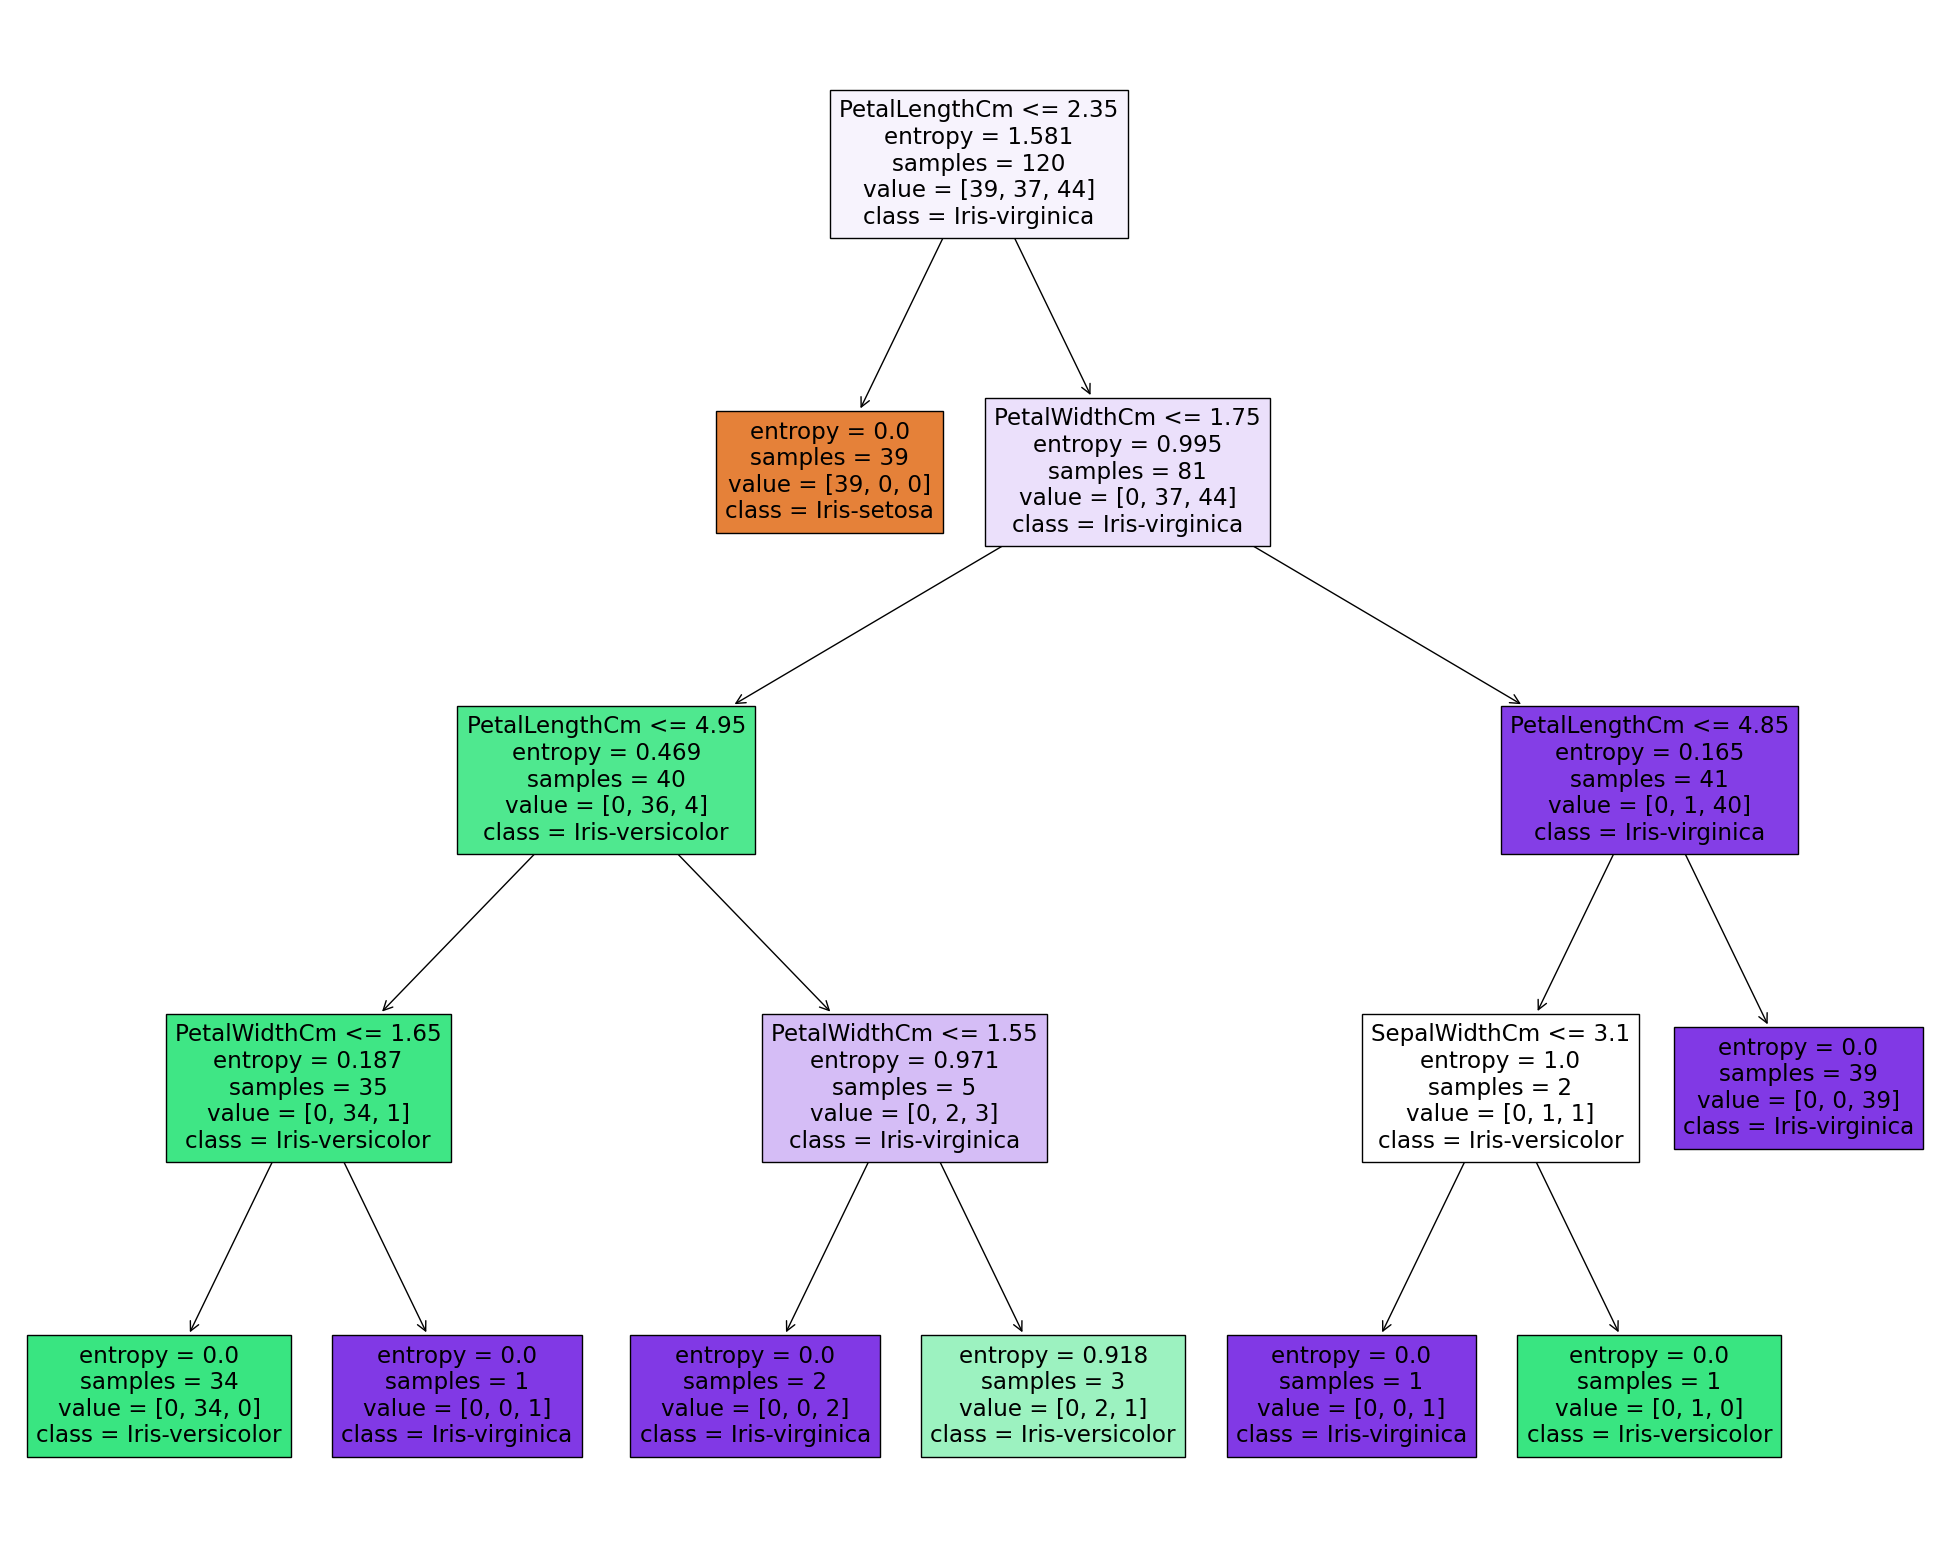

In [340]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                   filled=True)         

# Deployment (Implementasi): 
Tahap terakhir melibatkan implementasi model yang dikembangkan ke dalam lingkungan produksi atau penggunaan yang sebenarnya. Model akan diintegrasikan ke dalam sistem yang relevan atau digunakan untuk menghasilkan wawasan bisnis yang berguna.

In [341]:
df.to_csv('IrisNew.csv', index=False)